In [2]:
import pandas as pd
import numpy as np
import json
import zipfile
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib import cm
from sklearn.decomposition import PCA, FastICA

np.set_printoptions(suppress=True, linewidth=np.inf)

In [3]:
boston_pca = pd.read_csv(url, sep=' ', skipinitialspace=True, header=None, names=cols[0:13], index_col=False)
boston_pca_df = pd.concat([pd.DataFrame(boston_pca.iloc[:, i] - np.mean(boston_pca.iloc[:, i])) for i in range(13)], axis=1)
U, S, VT = np.linalg.svd(boston_pca_df.T)
pca_own_df = pd.DataFrame(columns=cols[0:13])
pca_own_df.loc[0] = (U @ S) / np.sum(U @ S)
pca_own_df

NameError: name 'url' is not defined

In [4]:
pca = PCA(n_components=13)
pca.fit(boston_pca)
pca_df = pd.DataFrame(columns=cols[0:13])
pca_df.loc[0] = (pca.components_ @ pca.explained_variance_ratio_)

NameError: name 'boston_pca' is not defined

In [5]:
transformer = FastICA(n_components=13, random_state=0, max_iter=1_000, whiten=True)
X_transformed = transformer.fit_transform(boston_pca)
unmixing = np.linalg.inv(transformer.mixing_)
independent_signals = pd.DataFrame(np.asarray(unmixing @ boston_pca.T).T, columns=cols[0:13])

NameError: name 'boston_pca' is not defined

In [6]:
independent_signals.plot(kind='box', figsize=(15,10))

NameError: name 'independent_signals' is not defined

NameError: name 'boston' is not defined

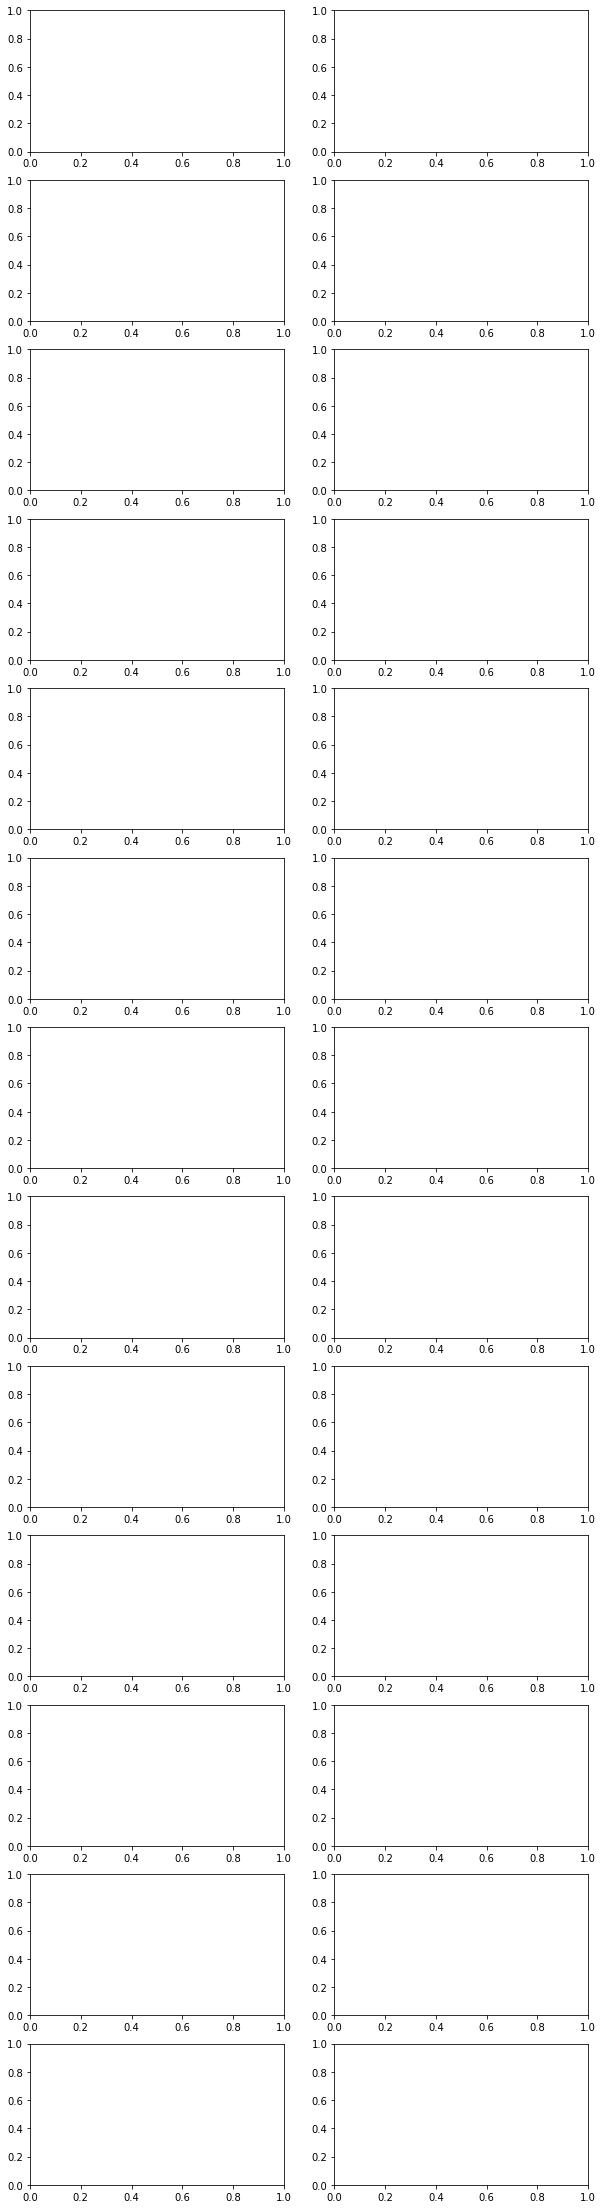

In [8]:
fig, axs = plt.subplots(13, 2, figsize=(10, 40))
for i in range(13):
    boston[cols[i]].plot(kind='kde', ax=axs[i, 0])
    independent_signals[cols[i]].plot(kind='kde', ax=axs[i, 1])
    axs[i, 0].set_title(cols[i])
    axs[i, 1].set_title(cols[i])